<a href="https://colab.research.google.com/github/ME-UoP-ME421/Kalman-FTS/blob/main/Group4_FTS_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-DOF Translational System
## Group Kalman - FTS

###Problem Description

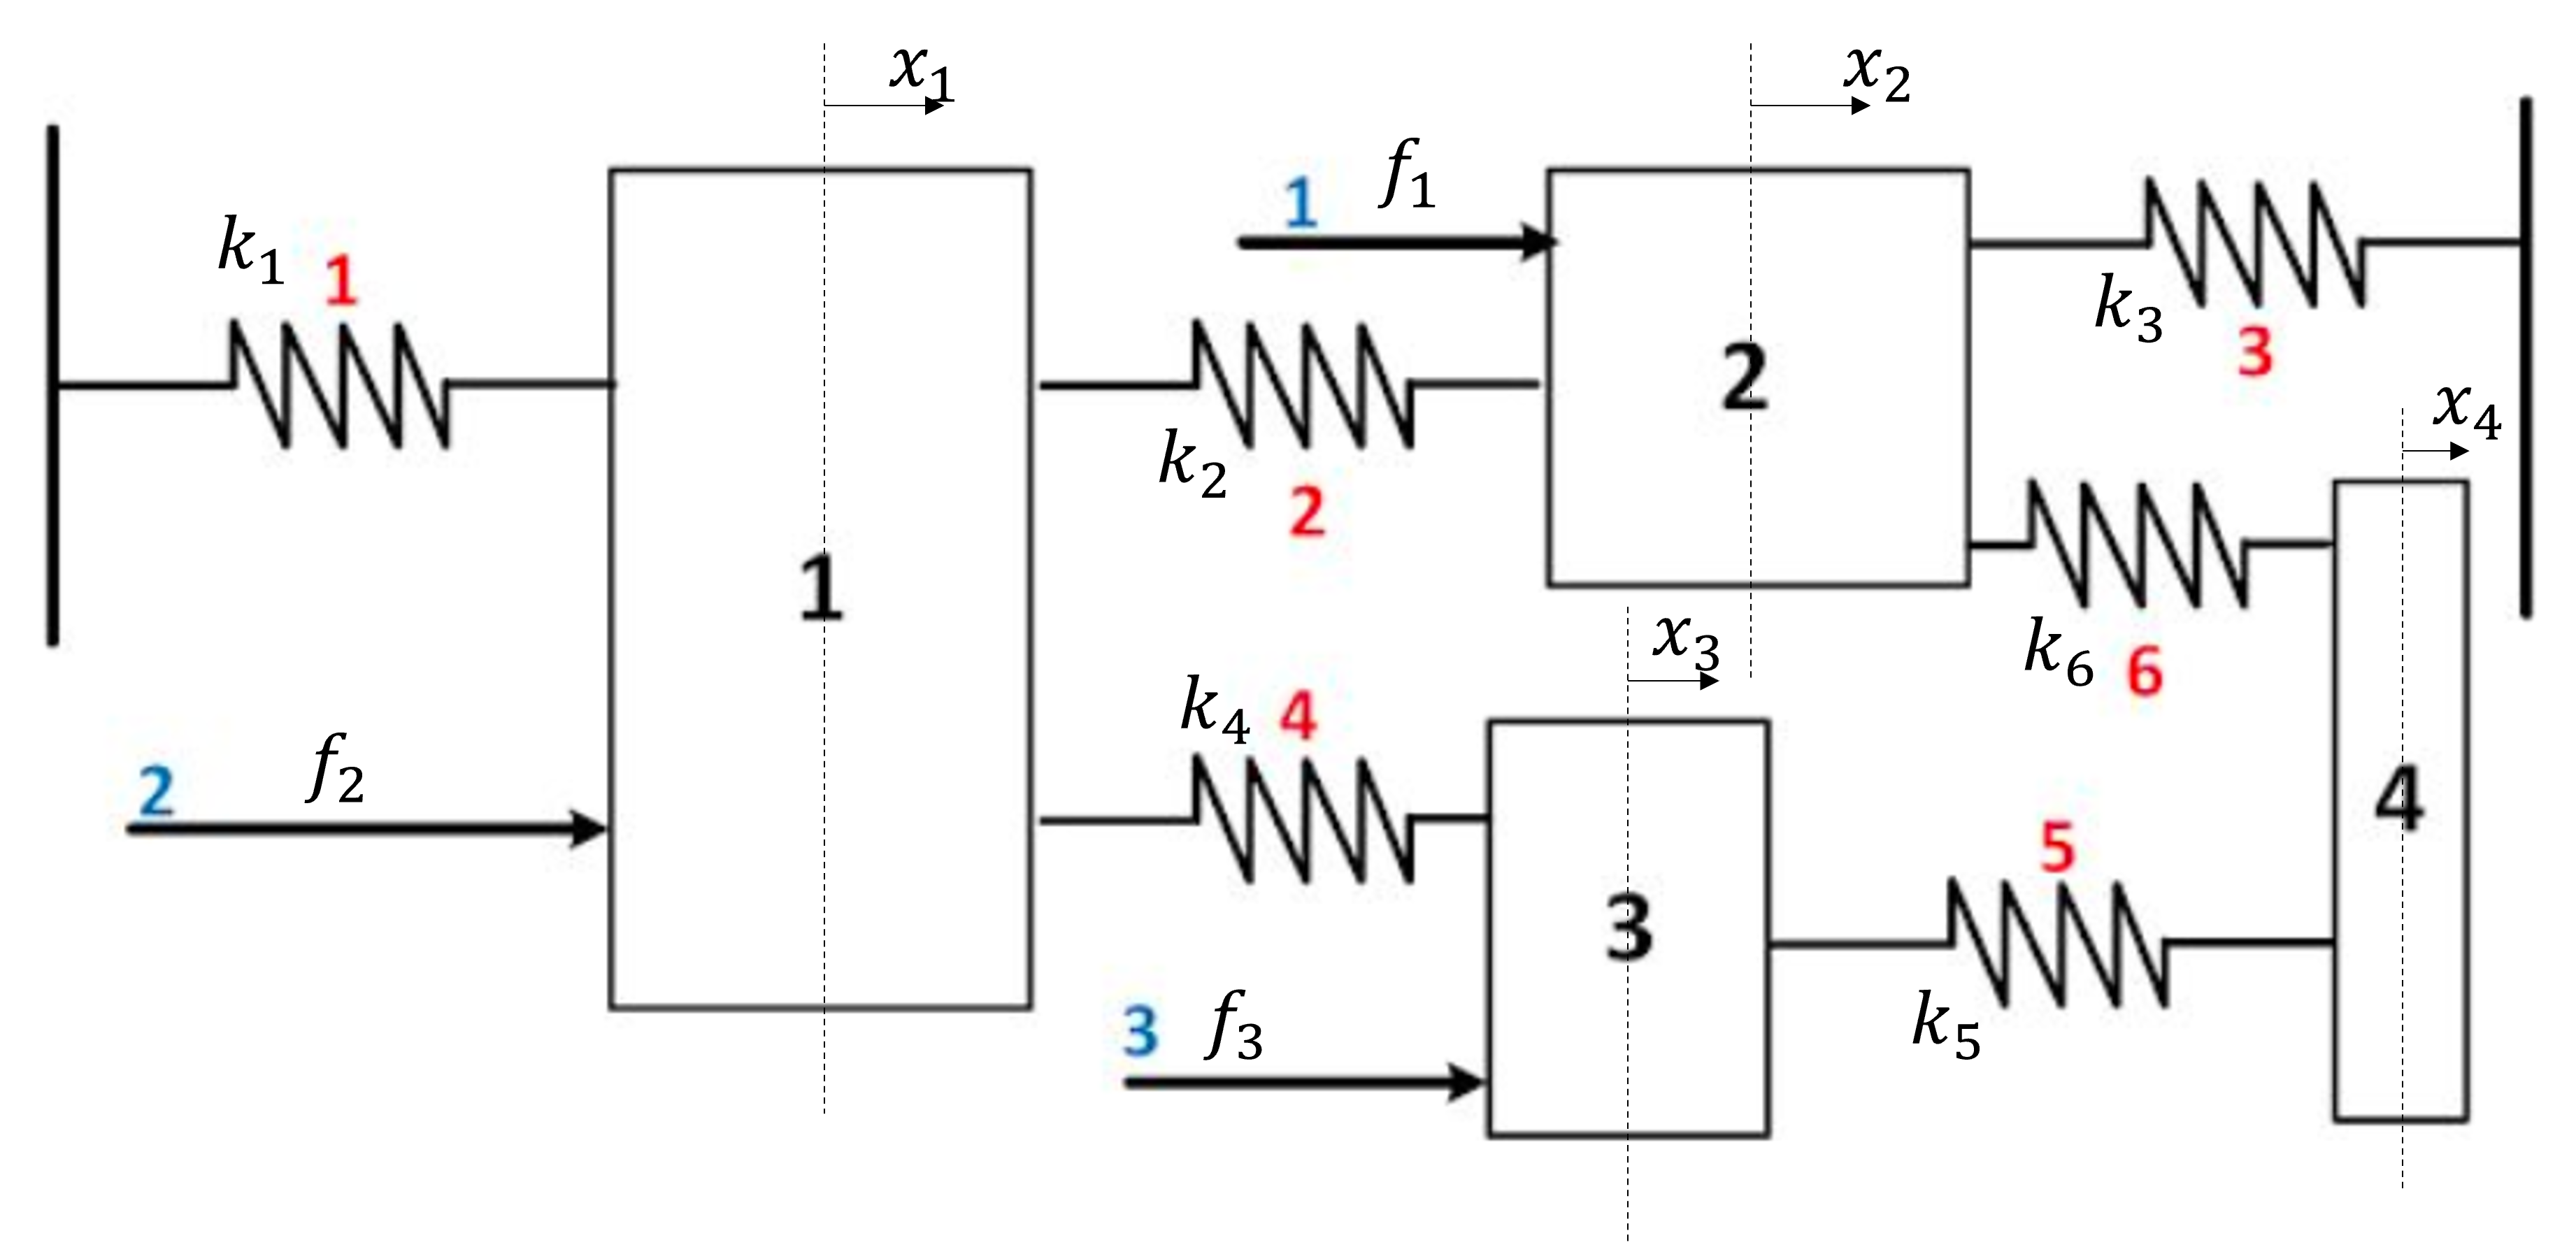


###Governing equations for the small amplitude motion of the 4-DOF Translational System

\begin{align}
m_1\ddot{x_1}+k_1x_1+k_2(x_1-x_2)+k_4(x_1-x_3)&= f_2\\
m_2\ddot{x_2}+k_2(x_2-x_1)+k_3x_2+k_6(x_2-x_3)&= f_1\\
m_3\ddot{x_3}+k_4(x_3-x_1)+k_5(x_3-x_4) &= f_3\\
m_4\ddot{x_4}+k_5(x_4-x_3)+k_6(x_4-x_2) &= 0\\\\
m_1\ddot{x_1} + (k_1+k_2+k_4)x_1-k_2x_2-k_4x_3 &= f_2\\
m_2\ddot{x_2} -k_2x_1+(k_2+k_3+k_6)x_2-k_6x_4 &= f_1\\
m_3\ddot{x_3} -k_4x_1 + (k_4+k_5)x_3-k_5x_4 &=f_3\\
m_4\ddot{x_4} -k_6x_2 - k_5x_3 + (k_5+k_6)x_4 &= 0\\
\end{align}



Dynamic System form,

\begin{align}
M\ddot{X} + KX &= F\\
\ddot{X}+\Omega X &= M^{-1}F :\:\:\ \Omega = M^{-1} K\\\\
M &= \begin{bmatrix} m_1 & 0 & 0 & 0 \\  0 & m_2 & 0 & 0 \\ 0 & 0 & m_3 & 0\\ 0& 0 & 0 & m_4\end{bmatrix} , & K = \begin{bmatrix} k_1+k_2+k_4 & -k_2 & -k_4 & 0\\ -k_2 & k_2+k_3+k_6 & 0 & -k_6 \\ -k_4 & 0 & k_4+k_5 & -k_5\\ 0 & -k_6 & -k_5 & k_5+ k_6 \end{bmatrix}
\end{align}



###Solving Dynamic System Form

Four degree of freedom translational system has four modes and four different natural frequencies. The natural frequencies are obtained from the square roots of the eigenvalues of $\Omega$ matrix. 

In [111]:
#find eigenvalues and eigenvectors
import numpy as np

m1 = 1
m2 = 2
m3 = 3
m4 = 4
k1 = 1
k2 = 2
k3 = 3
k4 = 4
k5 = 5
k6 = 6

M = np.array([[m1, 0, 0, 0], [0, m2,0,0] , [0,0,m3,0], [0,0,0,m4]])
K = np.array([[k1+k2+k4, -k2, -k4, 0], [-k2, k2+k3+k6, 0, -k6], [-k4, 0, k4+k5, -k5], [0, -k6, -k5, k5+k6]])

W = np.linalg.inv(M).dot(K)

sq_w = np.linalg.eigvals(W)


v = np.linalg.eig(W)
v

(array([8.936, 5.778, 0.325, 3.212]),
 array([[-0.883,  0.653,  0.463, -0.47 ],
        [ 0.379,  0.688,  0.405,  0.395],
        [ 0.238, -0.145,  0.57 , -0.643],
        [-0.14 , -0.281,  0.544,  0.458]]))

In [112]:
for i in range (4):
  print("Natural Frequency w",i ,"=",np.sqrt(sq_w[i]))

Natural Frequency w 0 = 2.9892513428735925
Natural Frequency w 1 = 2.40365259518468
Natural Frequency w 2 = 0.5702474983366518
Natural Frequency w 3 = 1.7921072516540903


In [113]:
#eigenvectors
from scipy import linalg

eigen_vals, eigen_vects = linalg.eig(K, M)
eigen_vals
print('The resulting eigenvalues are\n {:.2f}\n {:.2f} \n {:.2f} \n {:.2f}.'.format(eigen_vals[0], eigen_vals[1], eigen_vals[2], eigen_vals[3]))

The resulting eigenvalues are
 8.94+0.00j
 0.33+0.00j 
 5.78+0.00j 
 3.21+0.00j.


In [114]:
print('Four natural frequencies of the system are\n w0 = {:.2f}\n w1 = {:.2f} \n w2 = {:.2f} \n w3 = {:.2f}'.format(np.sqrt(eigen_vals[0]), np.sqrt(eigen_vals[1]), np.sqrt(eigen_vals[2]), np.sqrt(eigen_vals[3])))

Four natural frequencies of the system are
 w0 = 2.99+0.00j
 w1 = 0.57+0.00j 
 w2 = 2.40+0.00j 
 w3 = 1.79+0.00j


In [115]:
print('The eigenvectors are\nv1 = ', str(eigen_vects[:,0]), '\nv2 = ',str(eigen_vects[:,1]),'\nv3 = ',str(eigen_vects[:,2]),'\nv4 = ',str(eigen_vects[:,3]) )

The eigenvectors are
v1 =  [ 0.883 -0.379 -0.238  0.14 ] 
v2 =  [0.463 0.405 0.57  0.544] 
v3 =  [ 0.653  0.688 -0.145 -0.281] 
v4 =  [ 0.47  -0.395  0.643 -0.458]


State Space Representation of the FTS

\begin{align}
\dot{Y} &= AY + BU\\
Y &= \begin{bmatrix} x_1\\ \dot{x_1}\\x_2 \\ \dot{x_2} \\ x_3 \\ \dot{x_3} \\ x_4 \\ \dot{x_4}\end{bmatrix} ,\\ 
A &= \begin{bmatrix} 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 
\frac{k_1+k_2+k_4}{m_1} &0 & -\frac{k_2}{m_1} & 0 & -\frac{k_4}{m_1} & 0 & 0 & 0\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\ 
-\frac{k_2}{m_2} & 0 & \frac{k_2+k_3+k_6}{m_2} & 0 & 0& 0& -\frac{k_6}{m_2} & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\ 
-\frac{k_4}{m_3} & 0 & 0 & 0 & \frac{k_4+k_5}{m_3} & 0& -\frac{k_5}{m_3} & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0& 1\\
0& 0& -\frac{k_6}{m_4} & 0 & -\frac{k_5}{m_4} & 0 & \frac{k_5+k_6}{m_4} & 0\end{bmatrix},\\
B &= \begin{bmatrix} 0 & 0 & 0 & 0\\ \frac{1}{m_1} & 0 & 0 & 0\\  0 & 0 & 0 & 0\\0& \frac{1}{m_2} & 0& 0 \\ 0 & 0 & 0 & 0\\ 0& 0 & \frac{1}{m_3} & 0\\ 0 & 0 & 0 &0 \\ 0 & 0 & 0 & 0\\ \end{bmatrix},\\
U &=  \begin{bmatrix} f_2\\ f_1 \\ f_3\\ 0 \end{bmatrix}
\end{align}

###Solving State Space Form

In [116]:
#define variables
m1 = 1
m2 = 2
m3 = 3
m4 = 4
k1 = 1
k2 = 2
k3 = 3
k4 = 4
k5 = 5
k6 = 6

#improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

#define System Matrix A
A = np.array([[0, 1,0,0,0,0,0,0], 
             [(k1+k2+k4)/m1,0, -k2/m1, 0, -k4/m1,0 , 0, 0 ],
             [0,0,0,1,0,0,0,0],
             [-k2/m2, 0, (k2+k3+k6)/m2, 0,0,0, -k6/m2, 0],
             [0,0,0,0,0,1,0,0],
             [-k4/m3, 0,0,0, (k4+k5)/m3, 0, -k5/m3, 0],
             [0,0,0,0,0,0,0,1],
             [0,0,-k6/m4, 0, -k5/m4, 0, (k5+k6)/m4, 0]])

eigen_vals_A, eigen_vects_A = linalg.eig(A)
eigen_vals_A
print('The resulting eigenvalues are\n {:.2f}\n {:.2f} \n {:.2f} \n {:.2f}\n {:.2f}\n {:.2f} \n {:.2f} \n {:.2f}.'.format(eigen_vals_A[0], eigen_vals_A[1], eigen_vals_A[2], eigen_vals_A[3],eigen_vals_A[4], eigen_vals_A[5], eigen_vals_A[6], eigen_vals_A[7]))

The resulting eigenvalues are
 -2.99+0.00j
 -2.40+0.00j 
 -1.79+0.00j 
 2.99+0.00j
 2.40+0.00j
 1.79+0.00j 
 -0.57+0.00j 
 0.57+0.00j.


In [117]:
print('Four frequencies of the system are\n w0 = {:.2f} rad/s\n w1 = {:.2f} rad/s \n w2 = {:.2f} rad/s \n w3 = {:.2f} rad/s\n w4 = {:.2f} rad/s\n w5 = {:.2f} rad/s \n w6 = {:.2f} rad/s \n w7 = {:.2f} rad/s'.format(np.sqrt(eigen_vals_A[0]), np.sqrt(eigen_vals_A[1]), np.sqrt(eigen_vals_A[2]), np.sqrt(eigen_vals_A[3]),np.sqrt(eigen_vals_A[4]), np.sqrt(eigen_vals_A[5]), np.sqrt(eigen_vals_A[6]), np.sqrt(eigen_vals_A[7])))

Four frequencies of the system are
 w0 = 0.00+1.73j rad/s
 w1 = 0.00+1.55j rad/s 
 w2 = 0.00+1.34j rad/s 
 w3 = 1.73+0.00j rad/s
 w4 = 1.55+0.00j rad/s
 w5 = 1.34+0.00j rad/s 
 w6 = 0.00+0.76j rad/s 
 w7 = 0.76+0.00j rad/s


## Plot the Modes and System Response

In [118]:
#Display the plot inline
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

#Define the equation of motion using the state space representation of system as series of 1st order ODE  
def FTS_motion_eq(y, t, p):
  '''
  Arguments
    y : vector of state variables     y = [x1, dx1, x2, dx2, x3, dx3, x4, dx4]
    t : time
    p : vector of parameters          p = [m1, m2, m3, m4, k1, k2, k3, k4, k5, k6]
  '''
  x1, dx1, x2, dx2, x3, dx3, x4, dx4 = y
  m1, m2, m3, m4, k1, k2, k3, k4, k5, k6, f1, f2, f3 = p

  #System ODE function
  sysODE = [dx1, 
            ((k1+k2+k4)/m1)*x1 - (k2/m1)*x2 - (k4/m1)*x3 + f2/m1, 
            dx2, 
            -(k2/m2)*x1 + ((k2+k3+k6)/m2)*x2 - (k6/m2)*x4 + f1/m2, 
            dx3, 
            -(k4/m3)*x1 + ((k4+k5)/m3)*x3 - (k5/m3)*x4 + f3/m3, 
            dx4, 
            -(k6/m4)*x2 - (k5/m4)*x3 +((k5+k6)/m4)*x4]

  return sysODE


In [119]:
#importing the ODE Solver
from scipy.integrate import odeint

#initializing simulation parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

In [128]:
#solving the first order ODE initial value problem

#define variables
w = 2
m1 = 1
m2 = 1
m3 = 1
m4 = 1
k1 = 1
k2 = 2
k3 = 3
k4 = 2
k5 = 1
k6 = 1
f1 = 2
f2 = 0
f3 = 0

#initial conditions
x1_ic = 0.1
dx1_ic = 0
x2_ic = 0.5
dx2_ic = 0
x3_ic = 0.5
dx3_ic = 0
x4_ic = 0.5
dx4_ic = 0

#initialization of parameters and initial condition array
p = [m1, m2, m3, m4, k1, k2, k3, k4, k5, k6, f1, f2, f3]
x0 = [x1_ic, dx1_ic, x2_ic, dx2_ic, x3_ic, dx3_ic, x4_ic, dx4_ic]

#call the ODE solver function
sys_response = odeint(FTS_motion_eq, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

[None, None, None, None, None, None, None, None, None, None, None, None]

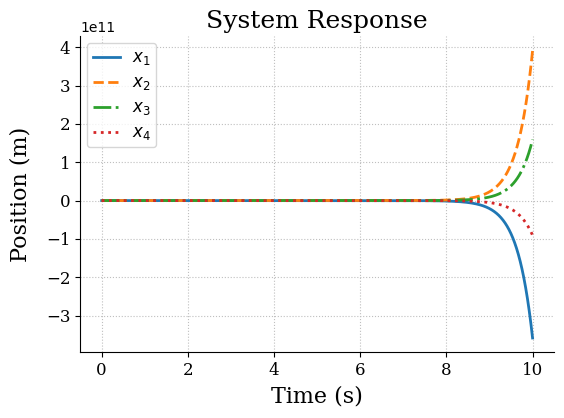

In [126]:
#plot the system response

#set the plot size 3:2 ratio
fig = plt.figure(figsize = (6, 4))
#get the current axis
axis = plt.gca()
plt.subplots_adjust(bottom = 0.17, left = 0.17, top = 0.96, right = 0.96)

# Change the axis units to serif
plt.setp(axis.get_ymajorticklabels(),family='serif',fontsize=12)
plt.setp(axis.get_xmajorticklabels(),family='serif',fontsize=12)

axis.spines['right'].set_color('none')
axis.spines['top'].set_color('none')

axis.xaxis.set_ticks_position('bottom')
axis.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
axis.grid(True,linestyle=':',color='0.75')
axis.set_axisbelow(True)

#define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=16, labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=16,labelpad=10)
plt.title('System Response',family='serif',fontsize=18)

plt.plot(t,sys_response[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,sys_response[:,2],linewidth=2,linestyle="--",label=r'$x_2$')
plt.plot(t,sys_response[:,4],linewidth=2,linestyle="-.", label=r'$x_3$')
plt.plot(t,sys_response[:,6],linewidth=2,linestyle=":",label=r'$x_4$')

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper left', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=12)

[None, None, None, None, None, None, None, None, None, None, None, None]

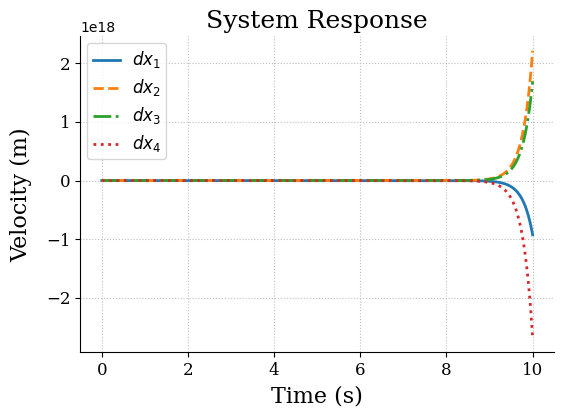

In [122]:
#plot the system response
from scipy.integrate import solve_ivp
# Solve the system using the Runge-Kutta method
#sol = solve_ivp(FTS_motion_eq, [t[0],t[-1]], x0, t_eval=t,method='RK45')


#set the plot size 3:2 ratio
fig = plt.figure(figsize = (6, 4))
#get the current axis
axis = plt.gca()
plt.subplots_adjust(bottom = 0.17, left = 0.17, top = 0.96, right = 0.96)

# Change the axis units to serif
plt.setp(axis.get_ymajorticklabels(),family='serif',fontsize=12)
plt.setp(axis.get_xmajorticklabels(),family='serif',fontsize=12)

axis.spines['right'].set_color('none')
axis.spines['top'].set_color('none')

axis.xaxis.set_ticks_position('bottom')
axis.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
axis.grid(True,linestyle=':',color='0.75')
axis.set_axisbelow(True)

#define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=16, labelpad=5)
plt.ylabel('Velocity (m)',family='serif',fontsize=16,labelpad=10)
plt.title('System Response',family='serif',fontsize=18)

plt.plot(t,sys_response[:,1],linewidth=2,label=r'$dx_1$')
plt.plot(t,sys_response[:,3],linewidth=2,linestyle="--",label=r'$dx_2$')
plt.plot(t,sys_response[:,5],linewidth=2,linestyle="-.", label=r'$dx_3$')
plt.plot(t,sys_response[:,7],linewidth=2,linestyle=":",label=r'$dx_4$')

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper left', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=12)

###Plot the Amplitude of the system with External Frequency

Since there are four natural frequencies, at each mode when the system frequency equals to one of the natural frequency, there will be resonance responce where system shows high amplitude motions. 

In [123]:
#plotting the amplitude vs external frequency 

M = np.array([[m1, 0, 0, 0], [0, m2,0,0] , [0,0,m3,0], [0,0,0,m4]])
K = np.array([[k1+k2+k4, -k2, -k4, 0], [-k2, k2+k3+k6, 0, -k6], [-k4, 0, k4+k5, -k5], [0, -k6, -k5, k5+k6]])

W = np.linalg.inv(M).dot(K)

eigvals = np.linalg.eigvals(W)
wn = np.sqrt(np.abs(eigvals))

frequency = np.linspace(0, 5, 1000)

#amplitude vectors
A1 = []
A2 = []
A3 = []
A4 = []

for w in frequency:
    sys_response = odeint(FTS_motion_eq, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)
    x1 = sys_response[:, 0]
    x2 = sys_response[:, 2]
    x3 = sys_response[:, 4]
    x4 = sys_response[:, 6]

    # Find the maximum amplitude of the system
    a1 = max(abs(x1))
    a2 = max(abs(x2))
    a3 = max(abs(x3))
    a4 = max(abs(x4))
    A1.append(a1)
    A2.append(a2)
    A3.append(a3)
    A4.append(a4)

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Set up the plot
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scatter"}]])

fig.add_trace(go.Scatter(x = frequency, y = A1, name='m1'))
fig.add_trace( go.Scatter(x = frequency, y = A2, name='m2 '))
fig.add_trace(go.Scatter(x = frequency, y = A3, name='m3'))
fig.add_trace( go.Scatter(x = frequency, y = A4, name='m4 '))

fig.add_shape(type='line', x0=wn[0], x1=wn[0], y0=0, y1=40, line=dict(color='yellow', width=2,dash='dash'))
fig.add_shape(type='line', x0=wn[1], x1=wn[1], y0=0, y1=40, line=dict(color='yellow', width=2,dash='dash'))
fig.add_shape(type='line', x0=wn[2], x1=wn[2], y0=0, y1=40, line=dict(color='yellow', width=2,dash='dash'))
fig.add_shape(type='line', x0=wn[3], x1=wn[3], y0=0, y1=40, line=dict(color='yellow', width=2,dash='dash'))


fig.add_annotation(x=wn[0], y=0, text='w1', showarrow=False, arrowhead=1)
fig.add_annotation(x=wn[1], y=0, text='w2', showarrow=False, arrowhead=1)
fig.add_annotation(x=wn[2], y=0, text='w3', showarrow=False, arrowhead=1)
fig.add_annotation(x=wn[3], y=0, text='w4', showarrow=False, arrowhead=1)

fig.update_xaxes(title_text="Frequency", range=[0, 5])
fig.update_yaxes(title_text="Amplitude", range=[0, 40])
fig.update_layout(title_text="Amplitude response of the system with frequency")


fig.show()

In [124]:
A1

[2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
 2.1158077293611786e+17,
